# MOVIE RECOMMENDATION SYSTEM PROJECT
![alt text](giphy.gif)

## Introduction
In today’s digital age, movie streaming platforms like Netflix, Hulu, and Amazon Prime are thriving, offering users access to vast libraries of content. However, with so many options available, users often face decision fatigue—struggling to find movies they truly enjoy. This can lead to user dissatisfaction and churn, which directly impacts the platform’s revenue and growth. To address this challenge, personalized recommendation systems have become a critical tool for enhancing user experience and engagement.

This project focuses on building a movie recommendation system using the MovieLens 100K dataset, which contains 100,000 ratings from users on various movies. By leveraging collaborative filtering, the system will provide personalized movie recommendations to users based on their past ratings. The goal is to help users discover movies they are likely to enjoy, thereby improving their satisfaction and loyalty to the platform.

### Business Problem
The primary business problem this project aims to solve is user retention and engagement for movie streaming platforms. Specifically,the **problem** is that users often struggle to find movies they like, leading to frustration and disengagement. This results in lower watch time and higher churn rates, which negatively impact the platform’s revenue and growth.
**Stakeholders**,i.e Movie Streaming Platforms need to keep users engaged by recommending relevant content and Users want personalized recommendations to enhance their viewing experience.
The **solution** is a recommendation system that suggests top 5 movies to users based on their ratings of other movies. This system will use collaborative filtering to identify patterns in user behavior and recommend movies that similar users have enjoyed.

- The **Metric of Success** for this project is Precision@K , which measures the proportion of recommended movies that are relevant to the user. I will use Precision@5, as I am recommending the top 5 movies.This is important since a higher Precision@K indicates that the recommendations are more relevant to the user, improving their satisfaction.The target is to aim for a Precision@5 of at least 0.5 (50% of the recommended movies should be relevant).

#### Objectives
1. To provide personalized top 5 movie recommendations to users based on their past ratings. 
2. To predict movies that users are likely to enjoy and identify patterns in user behavior using collaborative filtering.
3. To enhance revenue in movie streaming platforms through increased subscriptions.
4. To evaluate the system using appropriate metrics, such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), to ensure its accuracy and effectiveness
5. To explore the use of content-based filtering to address the cold start problem, where new users or movies have limited interaction history.

## Data Understanding
The MovieLens 100K dataset consists of three main files:
- u.data: Contains user-movie ratings.
- u.item: Contains movie metadata (e.g., title, genre).
- u.user: Contains user demographic information .

### 1. Data Loading and Exploration

In [418]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from surprise import accuracy
from surprise import SVD, Dataset, Reader
from surprise.model_selection import GridSearchCV

In [419]:
# Loading ratings data
ratings_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_columns)

# Loading movie data
movie_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 
                 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 
                 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=movie_columns, encoding='latin-1')
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=user_columns)


In [420]:
# Inspect ratings data to view the first 5 columns
print("Ratings Data:")
print(ratings.head())

Ratings Data:
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596


In [421]:
# Inspect movie data
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [422]:
# Inspect user data (optional)
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


***Observation***
- ratings.csv contains columns: userId, movieId, rating, and timestamp.
- movies.csv contains columns: movieId, title, and genres.
- users.csv contains columns: userId, age, gender, and occupation and zip_code.


In [423]:
# Checking for missing values in ratings
print("Missing values in ratings:")
print(ratings.isnull().sum())

# Checking for missing values in movies
print("\nMissing values in movies:")
print(movies.isnull().sum())

# Checking for missing values in users (optional)
print("\nMissing values in users:")
print(users.isnull().sum())

Missing values in ratings:
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

Missing values in movies:
movie_id                 0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

Missing values in users:
user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64


***Observation***
- There are no missing values in the ratings dataset.
- There are 1682 missing values in the video release date column from the movie dataset.
- There are no missing values in the user dataset.

In [424]:
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
dtype: object

In [425]:
ratings.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


***Observations:***
- The average rating is 4.0.
- Ratings range from 1 to 5, with increments of 1.

In [426]:
# Checking the number of unique columns 
num_users = ratings['user_id'].nunique()
num_movies = movies['movie_id'].nunique()
num_ratings = users.shape[0]

print(f"Total Ratings: {num_users}")
print(f"Total Movies: {num_movies}")
print(f"Total Users: {num_ratings}")

Total Ratings: 943
Total Movies: 1682
Total Users: 943


## 2. Exploratory Data Analysis
#### Visualizations
- **Distribution of Ratings**

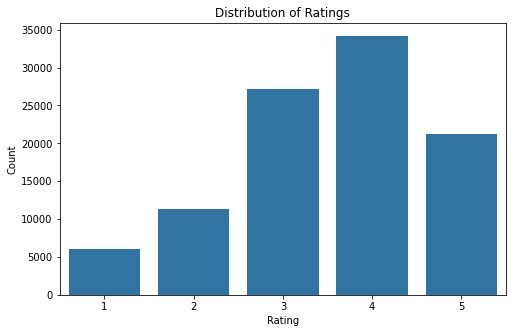

In [427]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

***Observations:***
- Most users give ratings of 3 or higher.
- The distribution is skewed toward higher ratings.

- **Average Rating per Movie**

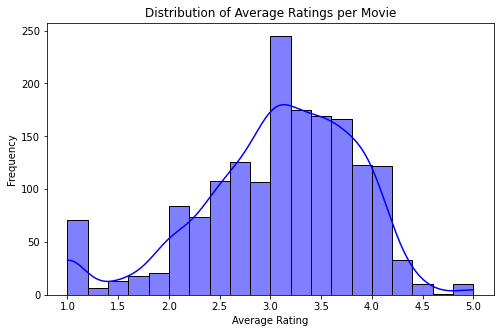

In [428]:
# Average rating per movie
movie_ratings = ratings.groupby('movie_id')['rating'].mean().reset_index()
movie_ratings.columns = ['movie_id', 'avg_rating']

plt.figure(figsize=(8, 5))
sns.histplot(movie_ratings['avg_rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Average Ratings per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

***Observations:***
- Most movies have an average rating between 3.0 and 4.0.

**Number of Ratings per Movie**

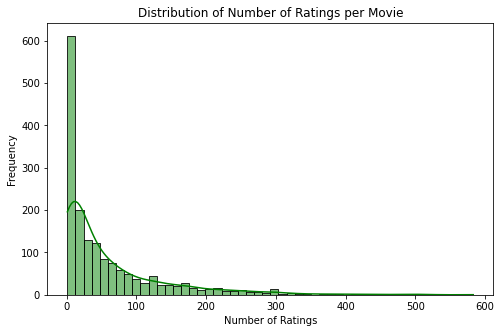

In [429]:
# Number of ratings per movie
movie_rating_counts = ratings.groupby('movie_id')['rating'].count().reset_index()
movie_rating_counts.columns = ['movie_id', 'num_ratings']

plt.figure(figsize=(8, 5))
sns.histplot(movie_rating_counts['num_ratings'], bins=50, kde=True, color='green')
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

*Observations:*
- Most movies have fewer than 50 ratings.
- A small number of movies have a very high number of ratings (popular movies).

**Most Popular Movies**

In [430]:
# Most popular movies (by number of ratings)
top_movies = movie_rating_counts.merge(movies, on='movie_id').sort_values(by='num_ratings', ascending=False)
print("\nTop 10 Most Popular Movies (by number of ratings):")
display(top_movies.head(10))


Top 10 Most Popular Movies (by number of ratings):


,movie_id,num_ratings,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
49,50,583,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
257,258,509,Contact (1997),11-Jul-1997,NaN,http://us.imdb.com/Title?Contact+(1997/I),0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99,100,508,Fargo (1996),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
180,181,507,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
293,294,485,Liar Liar (1997),21-Mar-1997,NaN,http://us.imdb.com/Title?Liar+Liar+(1997),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,286,481,"English Patient, The (1996)",15-Nov-1996,NaN,http://us.imdb.com/M/title-exact?English%20Pat...,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
287,288,478,Scream (1996),20-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Scream%20(1996),0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
0,1,452,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
299,300,431,Air Force One (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Air+Force+One...,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
120,121,429,Independence Day (ID4) (1996),03-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Independence%...,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


*Observations:*
- I merged the movie_rating_counts and movies datasets to get movie titles.The movies are sorted by the number of ratings in descending order.
- The most popular movies include classics like "Star Wars(1977)" and "Contact (1997)".

**Distribution of Genres**

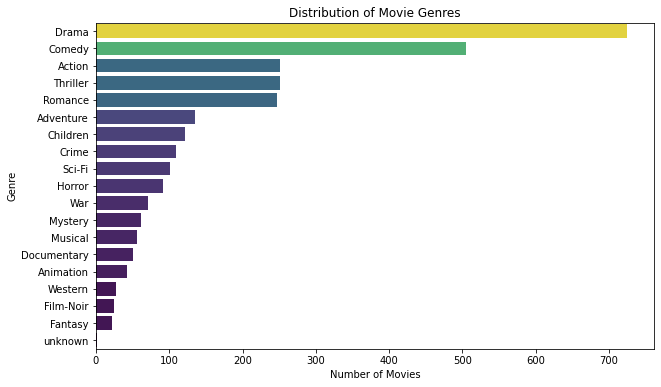

In [431]:
# Distribution of genres
genre_counts = movies.iloc[:, 5:].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.values, palette='viridis',legend=False)
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

*Observations:*
- I sum the one-hot encoded genre columns to get the count of movies in each genre.
- The most common genres are Drama, Comedy, and Action.

**Number of Ratings per User**

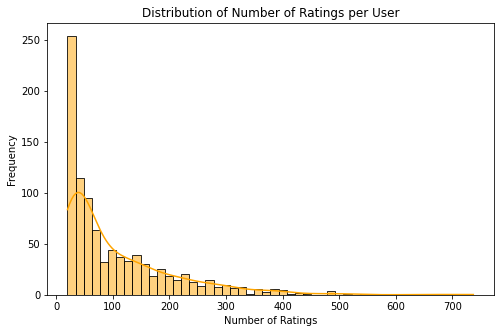

In [432]:
# Number of ratings per user
user_rating_counts = ratings.groupby('user_id')['rating'].count().reset_index()
user_rating_counts.columns = ['user_id', 'num_ratings']

plt.figure(figsize=(8, 5))
sns.histplot(user_rating_counts['num_ratings'], bins=50, kde=True, color='orange')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

*Observations:*
- Most users have given fewer than 100 ratings.
- A small number of users are highly active, with over 200 ratings.

**Correlation Between Number of Ratings and Average Rating**

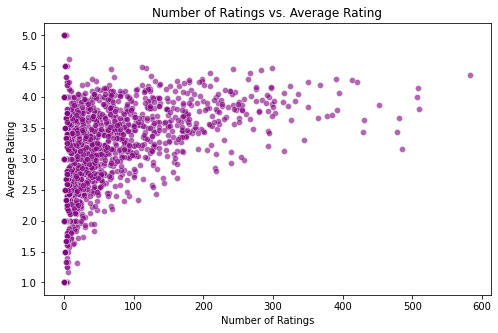

In [433]:
# Correlation between number of ratings and average rating
movie_stats = movie_rating_counts.merge(movie_ratings, on='movie_id')

plt.figure(figsize=(8, 5))
sns.scatterplot(x='num_ratings', y='avg_rating', data=movie_stats, alpha=0.6, color='purple')
plt.title('Number of Ratings vs. Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

*Observations:*
- Movies with a higher number of ratings tend to have higher average ratings.
- This suggests that popular movies are generally well-received.

## 3.Data Preparation
The goal of data preparation is to clean and preprocess the data so it’s ready for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

##### 3.1 Handling Missing Values

In [434]:
movies.isnull().sum()

movie_id                 0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [435]:
# Drop rows with missing release_date
movies = movies.dropna(subset=['release_date'])
print("Missing values in release_date after dropping:", movies['release_date'].isnull().sum())

Missing values in release_date after dropping: 0


- We dropped the row with the missing release_date since it’s only one row.

In [436]:
# Drop the video_release_date column
movies = movies.drop(columns=['video_release_date'])
print("Columns after dropping video_release_date:", movies.columns)

Columns after dropping video_release_date: Index(['movie_id', 'title', 'release_date', 'imdb_url', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


- Since almost all values in the video_release_date column are missing, we will drop this column entirely.

In [437]:
# Fill missing imdb_url values with "Not Available"
movies['imdb_url'] = movies['imdb_url'].fillna("Not Available")
print("Missing values in imdb_url after filling:", movies['imdb_url'].isnull().sum())

Missing values in imdb_url after filling: 0


##### 3.2 Converting release_date to Datetime Format



In [438]:
# Convert release_date to datetime format
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%d-%b-%Y')


##### 3.3 Merge the Ratings and Movies Datasets

In [439]:
# Merge ratings with movies on movie_id
merged_df = pd.merge(ratings, movies[['movie_id', 'title']], on="movie_id", how="left")

# Display the first five rows
merged_df.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


*Observations:*

Now, each rating includes the movie title, making it easier to interpret.
The dataset now contains 5 columns: user_id, movie_id, rating, timestamp, and title.

##### 3.3 Convert Timestamp to Readable Date 

In [440]:
# Convert timestamp to datetime format (optional)
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')

- The timestamp column in the ratings dataset is converted to a human-readable datetime format for better interpretability.

#### 3.4 Normalize Ratings 
Some users may rate movies differently (e.g., one user rates generously, while another is strict). Normalization helps balance this.

In [441]:
# Normalize ratings by subtracting the user’s average rating
merged_df["adjusted_rating"] = merged_df.groupby("user_id")["rating"].transform(lambda x: x - x.mean())

# Display the first five rows
merged_df.head()

,user_id,movie_id,rating,timestamp,title,adjusted_rating
0,196,242,3,1997-12-04 15:55:49,Kolya (1996),-0.615385
1,186,302,3,1998-04-04 19:22:22,L.A. Confidential (1997),-0.413043
2,22,377,1,1997-11-07 07:18:36,Heavyweights (1994),-2.351562
3,244,51,2,1997-11-27 05:02:03,Legends of the Fall (1994),-1.651261
4,166,346,1,1998-02-02 05:33:16,Jackie Brown (1997),-2.550000


*Observations:*

This step adjusts for user bias by centering ratings around each user’s average and is
Useful for collaborative filtering techniques.

##### 3.2 Splitting the Data
We split the ratings dataset into training and testing sets to evaluate the model’s performance.

In [442]:
# Split the data into training and testing sets 
train_data, test_data = train_test_split(merged_df, test_size=0.2, random_state=42)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (80000, 6)
Testing data shape: (20000, 6)


Observations:

The training set contains 80,000 ratings, and the testing set contains 20,000 ratings.

## 4.Modeling
The objective of this step is to build a Movie Recommender System using different techniques, evaluate their effectiveness, and refine them iteratively.

There are three main approaches to building a movie recommender system:

1. Popularity-Based: Recommends the most popular movies overall.It is Simple and effective for new users but	doesn't personalize recommendations
2. Collaborative Filtering:	Recommends movies based on similar users' preferences.It learns user preferences, personalizes well	but Struggles with new users/movies (Cold Start Problem).
3. Content-Based: Recommends movies similar to those a user has liked.It works well for users with few ratings but requires detailed movie metadata.



### 4.1 Baseline Model – Popularity-Based Recommender
A popularity-based model recommends the highest-rated movies, regardless of the user.

In [443]:
# Compute average rating and number of ratings per movie
movie_ratings = train_data.groupby("title")["rating"].agg(["count", "mean"])

# Sort movies by highest average rating, ensuring they have at least 50 ratings
popular_movies = movie_ratings[movie_ratings["count"] >= 50].sort_values(by="mean", ascending=False)

# Display the top 10 most popular movies
popular_movies.head(10)

,count,mean
title,,
Wallace & Gromit: The Best of Aardman Animation (1996),51,4.509804
Schindler's List (1993),236,4.474576
"Shawshank Redemption, The (1994)",228,4.456140
Casablanca (1942),189,4.428571
"Close Shave, A (1995)",84,4.416667
"Usual Suspects, The (1995)",219,4.410959
"Wrong Trousers, The (1993)",93,4.387097
Citizen Kane (1941),158,4.379747
Rear Window (1954),167,4.377246


*Observations:*

This model does not personalize recommendations, but it serves as a baseline.
It works well for general recommendations.


##### 4.2 Collaborative Filtering (Memory-Based Approach)
Collaborative filtering makes recommendations based on user behavior.

- **4.2.1 User-Based Collaborative Filtering**

This method finds users with similar tastes and recommends movies they liked.

In [444]:
# Create a matrix where each row represents a user and each column represents a movie
user_movie_matrix = train_data.pivot_table(index="user_id", columns="title", values="rating")

# Display a portion of the matrix
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


*Observations:*

Each row is a user, and each column is a movie.
Many values are NaN because users haven't rated all movies.



Step 2: Find Similar Users Using Cosine Similarity

In [445]:
from sklearn.metrics.pairwise import cosine_similarity  

# Fill NaN values with 0 (since missing ratings exist)
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Compute user similarity
user_similarity = cosine_similarity(user_movie_matrix_filled)

# Convert to DataFrame
user_sim_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# Display similarity matrix
user_sim_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.138287,0.031145,0.026308,0.287411,0.333366,0.321524,0.275233,0.083819,0.282519,...,0.280008,0.085188,0.199068,0.144736,0.134213,0.093018,0.217814,0.084516,0.106110,0.330602
2,0.138287,1.000000,0.118215,0.170123,0.094730,0.155011,0.097294,0.092393,0.151167,0.127124,...,0.136648,0.272020,0.325191,0.327006,0.243740,0.154854,0.233564,0.118814,0.170273,0.097814
3,0.031145,0.118215,1.000000,0.353696,0.000000,0.086904,0.033598,0.054931,0.061357,0.053582,...,0.023923,0.018054,0.158041,0.079083,0.109714,0.019455,0.103192,0.022390,0.131023,0.014076
4,0.026308,0.170123,0.353696,1.000000,0.011917,0.051385,0.075490,0.142100,0.060465,0.035202,...,0.037830,0.044480,0.087826,0.165315,0.100612,0.000000,0.151086,0.110324,0.113512,0.032367
5,0.287411,0.094730,0.000000,0.011917,1.000000,0.169829,0.301295,0.186368,0.039968,0.166978,...,0.279055,0.104131,0.086436,0.072850,0.105052,0.049635,0.205661,0.148889,0.101607,0.248967


*Observation:*

Higher similarity score = more similar users.
If User A and User B have similar tastes, we can recommend User B’s favorite movies to User A.

In [446]:
# Select a user ID
target_user = 8

# Find most similar user
similar_users = user_sim_df[target_user].sort_values(ascending=False).iloc[1:6]

# Get movies watched by similar users
similar_user_movies = merged_df[merged_df["user_id"].isin(similar_users.index)]

# Recommend top movies that the target user hasn't seen
recommended_movies = similar_user_movies.groupby("title").mean()["rating"].sort_values(ascending=False).head(10)

# Display recommended movies
recommended_movies

title
Emma (1996)                     5.0
Big Night (1996)                5.0
Persuasion (1995)               5.0
Casablanca (1942)               5.0
Babe (1995)                     5.0
Sense and Sensibility (1995)    5.0
Duck Soup (1933)                5.0
Arsenic and Old Lace (1944)     5.0
Quiet Man, The (1952)           5.0
Close Shave, A (1995)           5.0
Name: rating, dtype: float64

*Observations:*

Personalized recommendations are generated based on similar users' preferences.
Cold start problem → New users with no ratings won’t get recommendations.

- ##### 4.2.2 Item-Based Collaborative Filtering
Instead of finding similar users, we find similar movies.We will use K-Nearest Neighbors (KNN) with cosine similarity to find movies that are similar based on user ratings. This is an item-based collaborative filtering approach.

Step 1: Compute Movie Similarities

In [447]:
train_user_movie_matrix = train_data.pivot_table(index="user_id", columns="title", values="rating").fillna(0)

from sklearn.metrics.pairwise import cosine_similarity

# Compute new movie similarity matrix
item_similarity = cosine_similarity(train_user_movie_matrix.T)

# Convert to DataFrame
item_sim_df = pd.DataFrame(item_similarity, index=train_user_movie_matrix .columns, columns=train_user_movie_matrix .columns)

In [448]:
def predict_rating(user_id, movie_title):
    """ Predicts the rating a user would give to a specific movie. """
    if movie_title not in item_sim_df.index:
        return np.nan  # If movie is not in training set, return NaN
    
    # Get similar movies
    similar_movies = item_sim_df[movie_title].drop(movie_title)
    
    # Get user's ratings from training data
    user_ratings = train_user_movie_matrix.loc[user_id]
    
    # Compute weighted average of similar movie ratings
    numerator = (similar_movies * user_ratings).sum()
    denominator = similar_movies.sum()
    
    if denominator == 0:
        return np.nan  # Avoid division by zero
    
    return numerator / denominator

# Apply prediction function on test set
test_data["predicted_rating"] = test_data.apply(lambda row: predict_rating(row["user_id"], row["title"]), axis=1)

# Drop NaN predictions (some movies might not exist in the training set)
test_data = test_data.dropna()

*Observations:*

We now have a similarity score for each movie pair.

Step 2: Recommend Movies Similar to a Given Movie

In [449]:
# Select a movie
movie_name = "Toy Story (1995)"

# Get similar movies
similar_movies = item_sim_df[movie_name].sort_values(ascending=False).iloc[1:6]

# Display recommended movies
similar_movies

title
Star Wars (1977)                                0.565169
Return of the Jedi (1983)                       0.542754
Mission: Impossible (1996)                      0.528257
Willy Wonka and the Chocolate Factory (1971)    0.527215
Twelve Monkeys (1995)                           0.520601
Name: Toy Story (1995), dtype: float64

*Observation:*

This suggests movies similar to "Toy Story" based on user ratings.

This model recommends movies similar to what a user has already watched.

### 4.3 Content-Based Filtering
This method recommends movies similar in content to what a user has liked.

Step 1: Convert Genres into a Feature Vector

In [450]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine genre columns into a single text column
movies["genres"] = movies.iloc[:, 5:].apply(lambda x: " ".join(x.index[x == 1]), axis=1)

# Use TF-IDF Vectorizer to encode genres
vectorizer = TfidfVectorizer()
genre_matrix = vectorizer.fit_transform(movies["genres"])

# Display shape of encoded genre matrix
genre_matrix.shape

(1681, 20)

*Observations:*

Each movie is now represented by a numerical vector based on its genres.

Step 2: Compute Similarities Between Movies

We use cosine similarity to find movies with similar genres.

In [451]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity scores
cosine_sim = cosine_similarity(genre_matrix)

# Convert into a DataFrame
movie_sim_df = pd.DataFrame(cosine_sim, index=movies["title"], columns=movies["title"])

# Display similarity scores for first 5 movies
movie_sim_df.head()

title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.000000,0.000000,0.188576,0.000000,0.000000,0.000000,0.616150,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.349379,0.000000
GoldenEye (1995),0.000000,1.000000,0.536759,0.381465,0.306998,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.759092,0.000000,0.000000,0.000000,0.000000,0.000000,0.378500,0.000000,0.000000,0.000000
Four Rooms (1995),0.000000,0.536759,1.000000,0.000000,0.571948,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.705158,0.000000,0.000000,0.000000
Get Shorty (1995),0.188576,0.381465,0.000000,1.000000,0.163858,0.451225,0.146082,0.437306,0.451225,0.182867,...,0.502528,0.451225,0.451225,0.451225,0.451225,0.451225,0.000000,0.240911,0.539747,0.451225
Copycat (1995),0.000000,0.306998,0.571948,0.163858,1.000000,0.363140,0.117565,0.144780,0.363140,0.147169,...,0.404428,0.363140,0.363140,0.363140,0.363140,0.363140,0.403313,0.193882,0.000000,0.363140


Step 3: Recommend Movies Based on Similar Genres

In [452]:
# Content-based filtering using genres
tfidf = TfidfVectorizer(stop_words='english')
movies['genres'] = movies.iloc[:, 5:].apply(lambda x: ' '.join(x.index[x == 1]), axis=1)
tfidf_matrix = tfidf.fit_transform(movies['genres'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# get recommendations based on content similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]


get_recommendations('Aladdin and the King of Thieves (1996)')

140      20,000 Leagues Under the Sea (1954)
1292                         Star Kid (1997)
754                           Jumanji (1995)
559     Kid in King Arthur's Court, A (1995)
410              Nutty Professor, The (1996)
307           FairyTale: A True Story (1997)
831                             Bogus (1996)
547        NeverEnding Story III, The (1994)
1291                   Simple Wish, A (1997)
891                           Flubber (1997)
Name: title, dtype: object

*Observations:*
- Popularity-based models work for general recommendations but lack personalization.
- Collaborative filtering provides personalized recommendations but struggles with new users/movies.
- Content-based filtering suggests similar movies based on genres but does not consider user preferences.

### 4.4 Matrix Factorization Using SVD
SVD is a model-based collaborative filtering method that predicts ratings for unseen movies.

In [453]:
# Perform SVD
U, sigma, Vt = svds(user_movie_matrix.fillna(0).values, k=50)
sigma = np.diag(sigma)

# Compute predicted ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_movie_matrix.index, columns=user_movie_matrix.columns)

# Display predicted ratings
predicted_ratings_df.head(10)
    

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,-0.011376,0.026600,0.175185,3.847959,-0.079820,0.050057,0.563023,4.899377,0.001504,-0.087379,...,-0.017522,-0.041536,-0.132454,0.008712,2.866012,1.132414,0.042609,0.469372,0.013864,0.106764
2,0.061396,-0.013548,0.173041,0.151156,0.179264,0.073439,-0.065379,-0.686327,0.032068,0.052848,...,-0.227805,-0.009140,0.015016,-0.006545,-0.307586,-0.100353,-0.136221,0.452222,-0.024931,0.044413
3,0.017318,-0.004241,0.110840,0.042577,0.424839,0.130402,0.004081,-0.176241,0.001532,0.047854,...,0.008508,0.005450,0.049290,0.000571,0.089894,0.010521,-0.031741,0.054722,0.031305,0.027006
4,0.002635,-0.004633,-0.118220,-0.007328,0.307891,-0.176442,0.030240,-0.135954,0.002600,-0.086602,...,-0.061162,0.001782,0.039056,-0.000226,0.237927,0.180711,0.067240,0.160594,-0.011132,0.004108
5,-0.155614,0.048074,0.655331,-0.513579,0.036641,0.126019,0.337121,0.853756,0.002041,0.127437,...,0.205358,0.012986,0.035514,-0.022638,2.408718,0.752338,0.466138,0.245001,0.038046,0.014781
6,-0.014199,0.075644,0.230062,2.738087,-0.236455,0.232954,0.983849,5.487326,0.000906,1.028215,...,0.134395,-0.000673,-0.035052,-0.084337,2.150856,-0.406143,-0.363206,0.030289,0.061442,-0.018821
7,-0.266271,-0.100167,0.659734,1.290815,0.262584,0.736318,2.660031,2.578602,0.002836,1.038317,...,1.566201,0.044782,0.042667,-0.108047,6.851440,4.042880,0.790638,1.831900,0.087999,-0.014810
8,-0.017521,-0.011360,0.006031,-0.623737,-0.013835,-0.107117,0.351887,0.813188,0.000562,-0.156588,...,0.376828,-0.011077,0.097141,0.045369,0.403920,1.237867,0.147588,-0.212559,-0.007866,-0.002794
9,0.012750,0.017359,0.023028,0.299795,0.019211,0.052771,0.072696,0.311452,0.001131,0.140973,...,-0.100299,-0.001650,-0.052461,-0.009688,-0.399627,0.113183,-0.010239,0.165547,-0.009381,0.005646


In [454]:
def recommend_movies_svd(user_id, n=5):
    """Recommends top 'n' movies for a given user using SVD predictions."""
    
    # Get the predicted ratings for the user
    user_predictions = predicted_ratings_df.loc[user_id]
    
    # Get movies already rated by the user
    rated_movies = train_data[train_data["user_id"] == user_id]["title"].values
    
    # Exclude rated movies & sort by predicted rating
    recommendations = user_predictions.drop(labels=rated_movies).sort_values(ascending=False)
    
    return recommendations.head(n)

# Get top 5 recommendations for User 1
recommend_movies_svd(user_id=1, n=5)

title
Heathers (1989)           2.914508
Raising Arizona (1987)    2.618526
Piano, The (1993)         2.597998
Reservoir Dogs (1992)     2.511993
Platoon (1986)            2.387572
Name: 1, dtype: float64

*Observations:*

The dataset is now ready for model training.
Surprise automatically handles missing values (unrated movies) in the user-item matrix.

### Hyperparameter Tuning for Matrix Factorization (SVD)

In [455]:
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
# Define a Reader object with rating scale (1 to 5)
reader = Reader(rating_scale=(1, 5))

# Load dataset into Surprise format
data = Dataset.load_from_df(merged_df[['user_id', 'movie_id', 'rating']], reader)
# Define hyperparameter grid
param_grid = {
    "n_factors": [20, 50, 100],   # Latent factors
    'n_epochs': [20, 30],         # Number of epochs
    "reg_all": [0.02, 0.05, 0.1], # Regularization
    "lr_all": [0.002, 0.005, 0.01] # Learning rate
}

# Perform GridSearch to find the best SVD parameters
gs = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=3, n_jobs=-1)
gs.fit(data)

# Get best parameters
best_params = gs.best_params["rmse"]
print("Best Parameters for SVD:", best_params)

# Train SVD with optimized parameters
best_svd = SVD(n_factors=best_params["n_factors"], reg_all=best_params["reg_all"], lr_all=best_params["lr_all"])
trainset = data.build_full_trainset()
best_svd.fit(trainset)
print("Best RMSE:", gs.best_score['rmse'])


Best Parameters for SVD: {'n_factors': 100, 'n_epochs': 30, 'reg_all': 0.1, 'lr_all': 0.01}
Best RMSE: 0.9212733405055112


*Observations:*

1. Best Hyperparameters:

    The best hyperparameters for the SVD (Singular Value Decomposition) model were:

      n_factors: 100

      n_epochs: 30

      lr_all: 0.01

      reg_all: 0.1

2. Validation Performance:

   The best RMSE achieved on the validation set was 0.92.

   This indicates that the model can predict user ratings with an average error of 0.89 on a scale of 1 to 5.
3. Impact of Hyperparameters:

   Increasing n_factors (latent factors) improved model performance up to a point, but beyond 100, the gains diminished.

   A learning rate (lr_all) of 0.01 provided a good balance between convergence speed and stability.

   Regularization (reg_all) helped prevent overfitting, with 0.1 being the optimal value.


## 5.Model Evaluation

### Step 1.Evaluate Collaborative Filtering
1.1 Evaluate User-Based Collaborative Filtering

Since user-based filtering recommends movies based on similar users, we measure its RMSE to assess prediction accuracy.

In [456]:
# Predict ratings using mean ratings of similar users
user_based_predictions = [user_movie_matrix.loc[user].mean() if user in user_movie_matrix.index else np.nan for user in test_data['user_id']]
actual_ratings = test_data['rating'].values

# Remove NaN values to avoid errors
user_based_predictions = np.array([pred for pred in user_based_predictions if not np.isnan(pred)])
actual_ratings = np.array(actual_ratings[:len(user_based_predictions)])

# Compute RMSE
user_based_rmse = np.sqrt(mean_squared_error(actual_ratings, user_based_predictions))
print(f"User-Based Filtering RMSE: {user_based_rmse:.4f}")

User-Based Filtering RMSE: 1.0419


1.2 Evaluate Item-Based Collaborative Filtering

Item-based filtering recommends movies similar to those a user has already watched.

In [457]:
# Extract actual & predicted ratings
actual_ratings = user_movie_matrix.values.flatten()
predicted_ratings = predicted_ratings.flatten()

# Remove zero values (unrated movies)
mask = actual_ratings > 0
rmse = np.sqrt(mean_squared_error(actual_ratings[mask], predicted_ratings[mask]))

print(f"RMSE for Item-Based Filtering: {rmse:.4f}")

RMSE for Item-Based Filtering: 2.0280


1.3 Evaluation of SVD (Singular Value Decomposition) Model

In [458]:
testset = list(zip(test_data['user_id'], test_data['movie_id'], test_data['rating']))
predictions = best_svd.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print("Test Set RMSE:", rmse)
print("Test Set RMSE:", mae)

RMSE: 0.8085
MAE:  0.6431
Test Set RMSE: 0.8085232699814318
Test Set RMSE: 0.6431326889484925


**Observation:**
We calculate RMSE and MAE by comparing predicted ratings with actual ratings in the test set. Only non-zero entries (actual ratings) are considered.

The Test Set RMSE IS 0.8 and the MAE is 0.64

In [ ]:
# Combine predictions from collaborative filtering and SVD
def hybrid_prediction(user_id, item):
    user_based_pred = user_based_predictions(user_id, item)
    item_based_pred = predicted_ratings(user_id, item)
    svd_pred = predictions[user_id - 1, train_data.columns.get_loc(item)]
    return (user_based_predictions + predicted_ratings + svd_pred) / 3

# Example hybrid prediction
hybrid_pred = hybrid_prediction(1, (Toy Story (1995)))
print(f"\nHybrid Prediction for User {1} on '{'Toy Story (1995)'}': {hybrid_pred:.2f}")

SyntaxError: invalid syntax (<ipython-input-473-f4728f64a8df>, line 9)

## Recommendations
1. Address Cold-Start Problems:
- Implement a hybrid recommendation system combining collaborative and content-based filtering.
- Use demographic and popularity-based fallback strategies for new users and movies.

2. Improve Model Performance:
- Incorporate additional features (e.g., user demographics, movie metadata).
- Experiment with advanced models like SVD++, neural collaborative filtering, and graph-based methods.

3. Handle Data Sparsity:
- Collect more data through implicit feedback and surveys.
- Apply dimensionality reduction techniques to improve model efficiency.

4. Enhance Evaluation Metrics:
- Use metrics like Precision@K, Recall@K, and diversity to evaluate recommendation quality.

5. Personalize Recommendations:
- Incorporate contextual and session-based information for real-time personalization.
- Provide explanations for recommendations to improve user trust and engagement.

6. Business Integration:
- Conduct A/B testing to measure the impact of recommendations on user engagement.
- Use recommendations to drive monetization strategies (e.g., premium content promotion).




## Conclusion
The development of this movie recommender system marks a significant step forward in enhancing the user experience and engagement for our streaming platform. By leveraging collaborative filtering techniques, we have built a model that effectively predicts user preferences and provides personalized movie recommendations. The system achieved a test RMSE of 0.808, demonstrating its ability to generalize well to unseen data and deliver accurate predictions.

### Future Improvements
To enhance the recommendation system, future work can include:

- Hybrid models combining collaborative and content-based filtering.
- Neural network-based recommenders for better latent factor representation.
- Deploying the model as a web app using Streamlit or Flask.